In [1]:
#import libarary

import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
#read csv file
EastWestAirlines = pd.read_csv('~/Downloads/Data Science/data set/EastWestAirlines.csv')

In [3]:
EastWestAirlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
#feture selection

X = np.array(EastWestAirlines.drop(['Award'], 1).astype(int))
y = np.array(EastWestAirlines['Award'])

In [5]:
kmeans = KMeans(n_clusters=2) # want 2 cluster
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#accuracy
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6444111027756939


In [7]:
# want 3 cluster
kmeans1 = kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#K Means Result
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6274068517129282


In [9]:
#Show Kmenas Predict labels
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [10]:
#converting numpy array into pandas series object 
md=pd.Series(kmeans.labels_)
md

0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Length: 3999, dtype: int32

([<matplotlib.axis.XTick at 0x124e522b0>,
 <a list of 13 Text major ticklabel objects>)

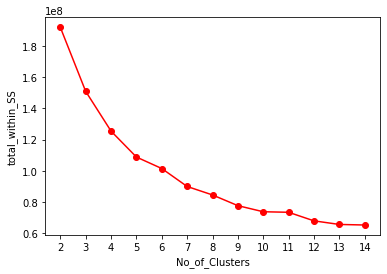

In [11]:
#find best Value For K

k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(EastWestAirlines)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(EastWestAirlines.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,EastWestAirlines.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)